In [1]:
import cv2
import matplotlib.pyplot as plt
import glob
import random
import os

In [2]:
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, xmin

In [3]:
def plot_box(image, bboxes, labels):
    #denormalize
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)
        thickness = max(2, int(w/275))
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color=(0,0,255), thickness=thickness)
        return image

In [4]:
def plot(image_paths, label_paths, num_samples=4):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))
    all_images.sort()
    num_images = len(all_images)
    plt.figure(figsize=(15,12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line [2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w ,h])
                labels.append(label)
            result_image = plot_box(image, bboxes, labels)
            plt.subplot(2, 2, i+1)
            plt.imshow(result_image[:,:,::-1])
            plt.axis('off')
        plt.subplots_adjust(wspace=1)
        plt.tight_layout()
        plt.show()

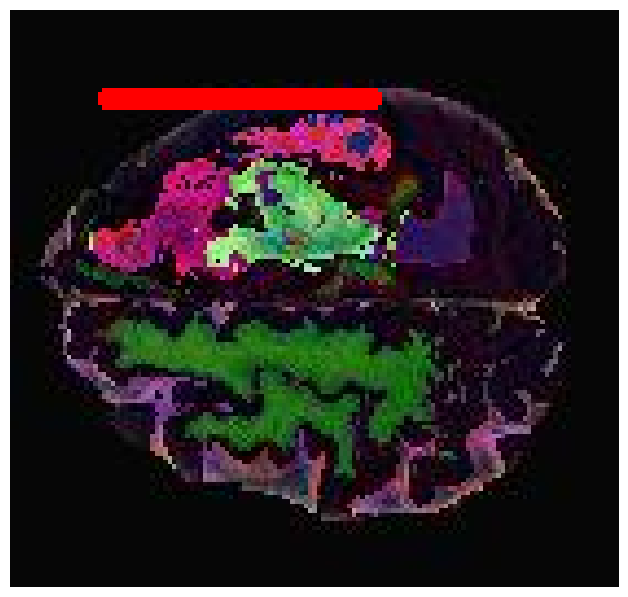

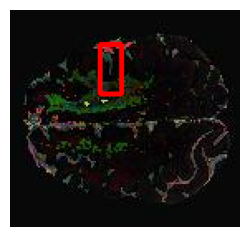

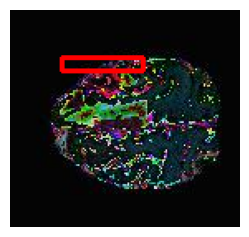

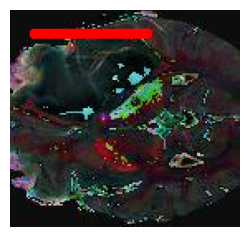

In [5]:
plot(image_paths = 'train/images',
     label_paths = 'train/labels',
     num_samples=4
    )

In [6]:
%%writefile tumor_v8.yaml
path: '/Users/benarviv/Documents/OpenU/2024א/Data Science Workshop/Data Science Project/Brain-Tumor-Detection'
train: 'train/images'
val: 'valid/images'
test: 'test/images'

#class names
names:
    0: 'type1'
    1: 'type2'
    2: 'type3'

Overwriting tumor_v8.yaml


In [7]:
!pip install ultralytics

In [8]:
EPOCHS = 5
BATCH = 8
IMG_SIZE = 240

In [9]:
from ultralytics import YOLO

In [10]:
model = YOLO('yolov8s.pt')

In [11]:
results = model.train(
    data = 'tumor_v8.yaml',
    imgsz = IMG_SIZE,
    epochs = EPOCHS,
    batch = BATCH,
    name = 'output'
)

Ultralytics YOLOv8.2.2 🚀 Python-3.11.0 torch-2.2.0 CPU (Apple M2 Pro)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=tumor_v8.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=240, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=output10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, 

Fontconfig warning: ignoring UTF-8: not a valid region tag


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /Users/benarviv/Documents/OpenU/2024א/Data Science Workshop/Data Science Project/Brain-Tumor-Detection/train/labels... 6930 images, 79 backgrounds, 0 corrupt: 100%|██████████| 6930/6930 [00:01<00:00, 4946.89it/s]


train: New cache created: /Users/benarviv/Documents/OpenU/2024א/Data Science Workshop/Data Science Project/Brain-Tumor-Detection/train/labels.cache


val: Scanning /Users/benarviv/Documents/OpenU/2024א/Data Science Workshop/Data Science Project/Brain-Tumor-Detection/valid/labels... 1980 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1980/1980 [00:00<00:00, 5228.52it/s]


val: New cache created: /Users/benarviv/Documents/OpenU/2024א/Data Science Workshop/Data Science Project/Brain-Tumor-Detection/valid/labels.cache
Plotting labels to runs/detect/output10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs/detect/output10
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.888      2.152      1.724          6        256: 100%|██████████| 867/867 [06:33<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [03:25<00:00,  1.66s/it]

                   all       1980       4380      0.394      0.377      0.356       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.795      1.794      1.648          5        256: 100%|██████████| 867/867 [06:29<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [03:27<00:00,  1.67s/it]

                   all       1980       4380      0.504       0.49      0.457      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.733      1.665      1.597          7        256: 100%|██████████| 867/867 [06:32<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [03:26<00:00,  1.66s/it]

                   all       1980       4380      0.592      0.521      0.524      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.665      1.513      1.549          4        256: 100%|██████████| 867/867 [06:38<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [03:26<00:00,  1.67s/it]

                   all       1980       4380      0.652      0.509      0.546      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.594      1.384      1.507          4        256: 100%|██████████| 867/867 [06:38<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [03:24<00:00,  1.65s/it]

                   all       1980       4380      0.754      0.562      0.624      0.322



5 epochs completed in 0.836 hours.
Optimizer stripped from runs/detect/output10/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/output10/weights/best.pt, 22.5MB

Validating runs/detect/output10/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.11.0 torch-2.2.0 CPU (Apple M2 Pro)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 124/124 [03:19<00:00,  1.61s/it]


                   all       1980       4380      0.754      0.562      0.624      0.322
                 type1       1980       1246      0.722       0.43      0.502      0.213
                 type2       1980       1944      0.764      0.724      0.762      0.453
                 type3       1980       1190      0.778      0.532      0.608      0.301
Speed: 0.1ms preprocess, 99.6ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/output10


In [12]:
# Assuming `model` is your trained YOLO model and `test_images` is a list of your test images

for image in test_images:
    # Run the model on the test image
    boxes, confidences, class_ids = model.predict(image)

    # Now `boxes` contains the bounding boxes predicted by the model,
    # `confidences` contains the confidence scores for each box, and
    # `class_ids` contains the class IDs for each box.

    # You can compare these predictions to the ground truth to evaluate the model.

AttributeError: 'YOLO' object has no attribute 'test'